<a href="https://colab.research.google.com/github/liuxx479/games/blob/master/unfair_coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions:**

For 2 coins (fair or unfair) with probabilities [pA, pB] to get head, how many tosses do we need to distinguish them (say at 1 sigma level). 

**Conclusions:**

1. Coin flipping is Binomial distribution, with an additional **p(1+p)** factor, compared to the variance in Poisson distribution (figure 1 below, comparing cyan and red curves).

2. You need ~ 630 tosses to distinguish [49%, 51%] coins; doesn't really matter if you flip only 1 coin, or 2 coins together (fig.1 case 1).

3. You only need ~150 tosses for [1%, 2%] coins (due to the p(1+p) suppression factor); if you are lucky and get the 1% coin, then 100 tosses is enough. Otherwise, 200 tosses is needed. If you toss them both, you need 150. (fig.1 case 2)

4. N_toss in 2 coin case equals to **N2=1/4(N1_A+N1_B)**, where N1_A, N1_B are the # of tosses you need if you just toss 1 coin (coin A or coin B). So I'd say just do both at the same time if you want to be safe. I show the number of tosses needed for both cases in Fig.2 below.



In [1]:
import numpy as np
from pylab import *
from numpy import math
%matplotlib inline

In [2]:
################################################
####### set up the coins, head=1, tail=-1
####### p = the number of possibility to be head
################################################
coin=lambda p, N_toss, N_attempts: (rand(N_attempts, N_toss)<p)*2-1

############################################
###### theoretical error for flipping coins
############################################
bino=lambda p: sqrt(p*(1-p)/Tosses)##sqrt(Tosses*p*(1-p))/Tosses ### binomial distribution
joint = lambda p1, p2: sqrt(bino(p1)**2+bino(p2)**2) ### error propagation to 2 coins

In [3]:
###############################
########## Toss the coins here
##############################

N_toss=5000
N_attempts=10000 # for error bar
Tosses = np.arange(1,N_toss+1) ## toss counter

###### scenario 1: A 51% head; B 49% head
p1A, p1B=0.49, 0.51
results1A = coin(p1A, N_toss, N_attempts)
results1B = coin(p1B, N_toss, N_attempts)

###### scenario 2: A 1% head; B 2% head
p2A, p2B=0.01, 0.02
results2A = coin(p2A, N_toss, N_attempts)
results2B = coin(p2B, N_toss, N_attempts)

In [4]:
###### sanity check: make sure coin function is right - pass

# plot(Tosses, cumsum(mean(results1A==1,axis=0))/Tosses,label='%s head'%(p1A))
# plot(Tosses, cumsum(mean(results1B==1,axis=0))/Tosses,label='%s head'%(p1B))
# plot(Tosses, cumsum(mean(results2A==1,axis=0))/Tosses,label='%s head'%(p2A))
# plot(Tosses, cumsum(mean(results2B==1,axis=0))/Tosses,label='%s head'%(p2B))
# xlabel('$N_{toss}$',fontsize=14)
# ylabel('$N_{head}/N_{toss}$',fontsize=14)
# legend()
# title('Fig.1 code test')
# show()

In [5]:
def plot_results(out, iylabel, ititle, null_value, iprob, err_theory):
  imean, istd = mean(out,axis=0), std(out,axis=0) ## data mean, std
  plot(Tosses, imean+err_theory, 'c-',label='theoretical error')
  plot(Tosses, null_value*ones(N_toss), 'k-', label='null')   ##### null
  plot(Tosses, out[100],'-',label='1 sample experiment')
  plot(Tosses, imean, 'r-',label='avg %i experiments'%(N_attempts))  
  fill_between(Tosses, imean-istd, imean+istd, color='r', alpha=0.5, label='std %i experiments'%(N_attempts))  
  ########### figure out when I can stop, both MC and theory
  idx=where (abs(imean-null_value)>istd)[0]
  idx_theory=where (abs(imean-null_value)>err_theory)[0]
  if len(idx)>0:
    ititle+='\n Need No. of tosses: %i (MC), %i (theory)'%(Tosses[idx[0]], Tosses[idx_theory[0]]) 
  #################################################
  xlabel('$N_{toss}$',fontsize=14)
  ylabel(iylabel, fontsize=14)
  ylim(imean[100]-3*istd[100], imean[100]+4*istd[100])
  legend(loc='upper right')
  title(ititle)

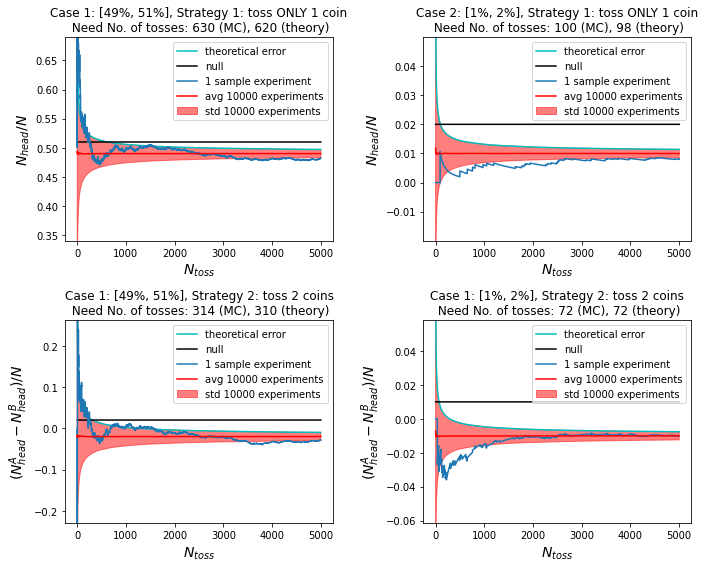

In [6]:
###### strategy 1: just toss 1 coin and see its head and tail difference
figure(figsize=(10,8))

#### case 1
out = cumsum((results1A==1)*1, axis=1)/Tosses
ititle='Case 1: [49%, 51%], Strategy 1: toss ONLY 1 coin'
iylabel='$N_{head} / N$'
subplot(221)
plot_results(out, iylabel, ititle, null_value = p1B, iprob=p1A, err_theory=bino(p1A))

# ###### case 2
out = cumsum((results2A==1)*1, axis=1)/Tosses
ititle='Case 2: [1%, 2%], Strategy 1: toss ONLY 1 coin'
iylabel='$N_{head} / N$'
subplot(222)
plot_results(out, iylabel, ititle, null_value = p2B, iprob=p2A, err_theory=bino(p2A))

####### strategy 2: toss 2 coins simultaneously, and look at their differences
#### case 1
out = cumsum((results1A==1)*1-(results1B==1)*1, axis=1)/Tosses
ititle='Case 1: [49%, 51%], Strategy 2: toss 2 coins'
iylabel='$(N_{head}^A-N_{head}^B)/ N$'
subplot(223)
plot_results(out, iylabel, ititle, null_value = p1B-p1A, iprob=p1A, err_theory=joint(p1A, p1B))

###### case 2
out = cumsum((results2A==1)*1-(results2B==1)*1, axis=1)/Tosses
ititle='Case 1: [1%, 2%], Strategy 2: toss 2 coins'
iylabel='$(N_{head}^A-N_{head}^B)/ N$'
subplot(224)
plot_results(out, iylabel, ititle, null_value = p2B-p2A, iprob=p2A, err_theory=joint(p2A, p2B))

plt.tight_layout()
show()

In [34]:
# bino_single = lambda p: sqrt(p*(1-p)/N_toss) ## eq.1
# joint_single = lambda p1, p2: sqrt(p1*(1-p1)+p2*(1-p2))/sqrt(N_toss) ## eq.2

def Ntoss_need (p1, p2):
  '''compute the number of tosses needed to make decision
  with both strategies'''
  gap = abs(p1-p2)
  ## method 1, toss only 1 coin, solve eq.1, gap=bino_single
  N1 = (p1*(1-p1))/gap**2
  N2 = (p2*(1-p2))/gap**2
  ## method 2, toss both coins, sovle eq.2, gap=joint_single
  Njoint = 2*(N1+N2)/4.0
  return ceil(N1), ceil(N2), ceil(Njoint)

In [35]:
pbins=linspace(0.01,0.99,99)
pgrid=meshgrid(pbins,pbins)
N1_grid, N2_grid, Njoint_grid = Ntoss_need(pgrid[0], pgrid[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


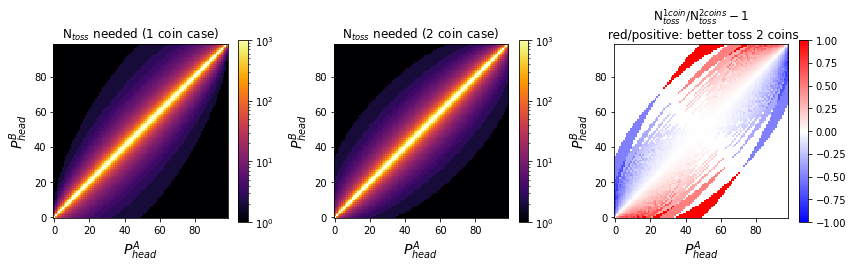

In [45]:
from matplotlib.colors import LogNorm
figure(figsize=(12,3.5))
subplot(131)
imshow(N1_grid, origin='lower', cmap=cm.inferno, norm=LogNorm(vmin=1, vmax=1e3),interpolation='nearest')
xlabel('$P^A_{head}$',fontsize=14)
ylabel('$P^B_{head}$',fontsize=14)
title('N$_{toss}$ needed (1 coin case)')
colorbar()

subplot(132)
imshow(Njoint_grid, origin='lower', cmap=cm.inferno, norm=LogNorm(vmin=1, vmax=1e3),interpolation='nearest')
xlabel('$P^A_{head}$',fontsize=14)
ylabel('$P^B_{head}$',fontsize=14)
title('N$_{toss}$ needed (2 coin case)')
colorbar()

subplot(133)
imshow( N1_grid/Njoint_grid-1, origin='lower', vmin=-1, vmax=1, cmap=cm.bwr, interpolation='nearest')
xlabel('$P^A_{head}$',fontsize=14)
ylabel('$P^B_{head}$',fontsize=14)
title('N$_{toss}^{1 coin}$/N$_{toss}^{2 coins}-1$ \n red/positive: better toss 2 coins')
colorbar()

plt.tight_layout()
show()